In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Step 1:take data and create dataframe

In [5]:
df=pd.read_csv("/content/reprocessed.hungarian.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num(predicted attribute)
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0


In [7]:
df.shape#number of rows and columns

(294, 14)

In [8]:
df.columns      

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num(predicted attribute)'],
      dtype='object')

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num(predicted attribute)
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


In [20]:
df.isnull().sum()   #to check if there are any missing values

age                         0
sex                         0
cp                          0
trestbps                    0
chol                        0
fbs                         0
restecg                     0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          0
thal                        0
num(predicted attribute)    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       294 non-null    int64  
 1   sex                       294 non-null    int64  
 2   cp                        294 non-null    int64  
 3   trestbps                  294 non-null    int64  
 4   chol                      294 non-null    int64  
 5   fbs                       294 non-null    int64  
 6   restecg                   294 non-null    int64  
 7   thalach                   294 non-null    int64  
 8   exang                     294 non-null    int64  
 9   oldpeak                   294 non-null    float64
 10  slope                     294 non-null    int64  
 11  ca                        294 non-null    int64  
 12  thal                      294 non-null    int64  
 13  num(predicted attribute)  294 non-null    int64  
dtypes: float64

In [21]:
df['num(predicted attribute)'].value_counts()

0    188
1     37
3     28
2     26
4     15
Name: num(predicted attribute), dtype: int64

2. Data visualization


age                            AxesSubplot(0.125,0.749828;0.227941x0.130172)
sex                         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
cp                          AxesSubplot(0.672059,0.749828;0.227941x0.130172)
trestbps                       AxesSubplot(0.125,0.593621;0.227941x0.130172)
chol                        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
fbs                         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
restecg                        AxesSubplot(0.125,0.437414;0.227941x0.130172)
thalach                     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
exang                       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
oldpeak                        AxesSubplot(0.125,0.281207;0.227941x0.130172)
slope                       AxesSubplot(0.398529,0.281207;0.227941x0.130172)
ca                          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
thal                              AxesSubplot(0.125,0.125;0.227941x0.130172)

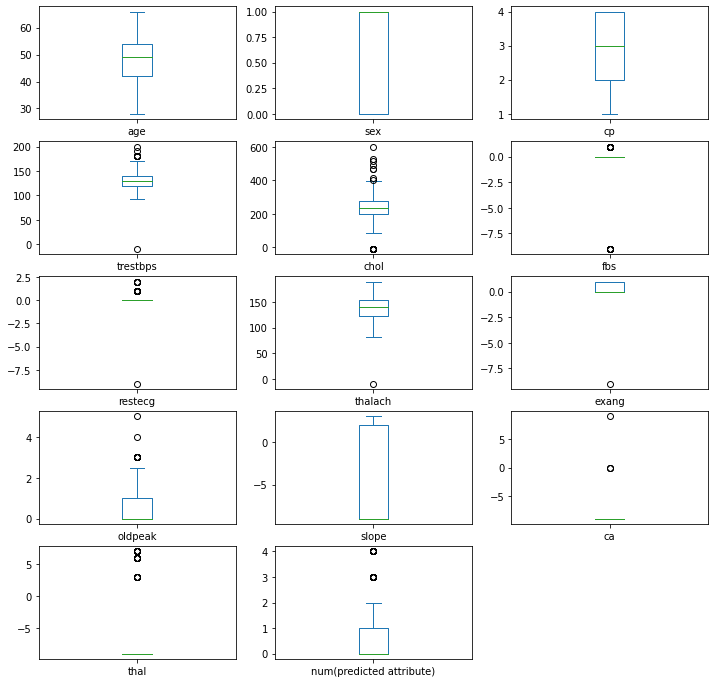

In [12]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))

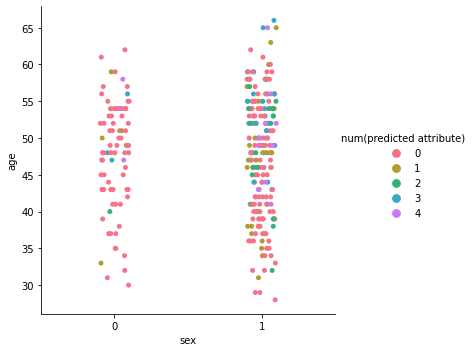

In [15]:
sns.catplot(data=df,x='sex',y='age',hue='num(predicted attribute)',palette='husl')

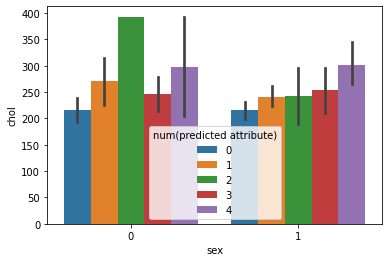

In [16]:
sns.barplot(data=df,x='sex',y='chol',hue='num(predicted attribute)')

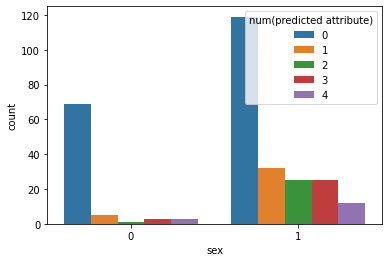

In [18]:
sns.countplot(x='sex',data=df,hue='num(predicted attribute)')

splitting features and target

In [27]:
X=df.drop(columns='num(predicted attribute)',axis=1)
Y=df['num(predicted attribute)']

In [28]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     40    1   2       140   289    0        0      172      0      0.0   
1     49    0   3       160   180    0        0      156      0      1.0   
2     37    1   2       130   283    0        1       98      0      0.0   
3     48    0   4       138   214    0        0      108      1      1.5   
4     54    1   3       150    -9    0        0      122      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   48    0   2        -9   308    0        1       -9     -9      2.0   
290   36    1   2       120   166    0        0      180      0      0.0   
291   48    1   3       110   211    0        0      138      0      0.0   
292   47    0   2       140   257    0        0      135      0      1.0   
293   53    1   4       130   182    0        0      148      0      0.0   

     slope  ca  thal  
0       -9  -9    -9  
1        2  -9    -9  
2       -9  -9    

In [29]:
print(Y)

0      0
1      1
2      0
3      3
4      0
      ..
289    0
290    0
291    0
292    0
293    0
Name: num(predicted attribute), Length: 294, dtype: int64


splitting data into training and testing

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(294, 13) (205, 13) (89, 13)


training model-logistic regression

In [34]:
model=LogisticRegression()

In [36]:
model.fit(X_train,Y_train)

LogisticRegression()

evaluating model-accuracy score

In [38]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [39]:
print("accuracy : ",training_data_accuracy)

accuracy :  0.6780487804878049


In [41]:
#accuracy on testing data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [42]:
print(test_data_accuracy)

0.6179775280898876


In [44]:
input_data=(48,0,4,138,214,0,0,108,1,1.5,2,-9,-9)
input_data_np=np.asarray(input_data)

input_data_reshaped=input_data_np.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Person does not have heart disease")
else:
  print("Person has heart disease")

[3]
Person has heart disease


In [45]:
input_data=(54,1,3,150,-9,0,0,122,0,0,-9,-9,-9)
input_data_np=np.asarray(input_data)

input_data_reshaped=input_data_np.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Person does not have heart disease")
else:
  print("Person has heart disease")

[0]
Person does not have heart disease
